# Names and IDs
 1. Matan Leventer - 208447029
 2. Rom Amsili - 316509397

# I. Condorcet's Jury Theorem (1785)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

In [ ]:
import numpy as np
import random
from scipy.stats import mode
from matplotlib import pyplot as plt


def crude_monte_carlo(p,n,num_samples=10000):
    """
    This function performs the Crude Monte Carlo.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    """
    avg = np.zeros(p.shape[0])
    for _ in range(num_samples):
      randoms = np.random.rand(n,p.shape[0])
      prob = randoms < p
      avg += mode(prob, axis=0)[0].astype(int)[0]
    return(avg / num_samples)

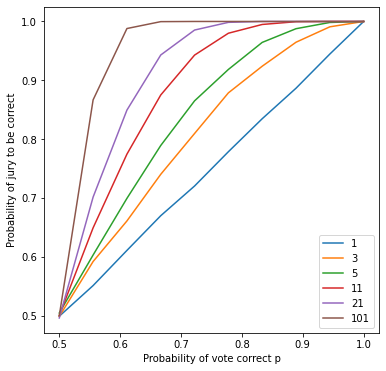

In [ ]:
x = np.linspace(0.5,1,10)
jury_number = [1,3,5,11,21,101]
plt.figure(figsize=(6,6))
for n in jury_number:
  y = crude_monte_carlo(x,n)
  plt.plot(x,y)
plt.legend(jury_number,loc="lower right")
plt.xlabel("Probability of vote correct p")
plt.ylabel("Probability of jury to be correct")
plt.show()

# **Answer 2**
The weak law of large numbers states that the series of averages converges with probability to expectation, that is, the chance of the mean being far from the expectation tends to zero when the sample size tends to infinity.

Let $x_1,\ x_2,\ \ldots,\ x_n$ to be a series of mismatched random variables, having the same finite span and the same variance.

Let $μ$ be the expected proportion of voters to be correct:

$μ$ = $E |\frac{(x1+x2+..+xn)} n|$ = $\frac{(E|x1|+E|x2|+..+E|Xn|)} n $ = $\frac{np} n = p$

It is given that P(xi) > 0.5, When $x_i$ is 1 or 0 if the result is correct or not - Indicator:

**$P(X=x_i)$** : 
  $p(x_i=correct)$,  $x=1$ and 
  $1-p(x_i=correct)$, $x=0$

The expectation is :

**$E|x_i|$** =$1*p(x=correct) + 0*(1-p(x=correct)) = p$

We are given the following:

**P(The majority is correct)** = $P(X^*>0.5)$
$X^* =\frac{(x_1+x_2+..+x_n)} n   $

The weak law of large numbers states that for all $ϵ > 0$:

**lim(n --> $\infty$) : P( |𝒳* - μ| < ϵ ) = 1**

Hence it follows that:

$P > 0.5$ --> $X^* > 0.5$ --> $P(X^*>0.5) = 1$ = **P(The majority is correct).**

# II. AdaBoost
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-10,loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:** 
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`.
 2. Explain you results in text and support it with figures.

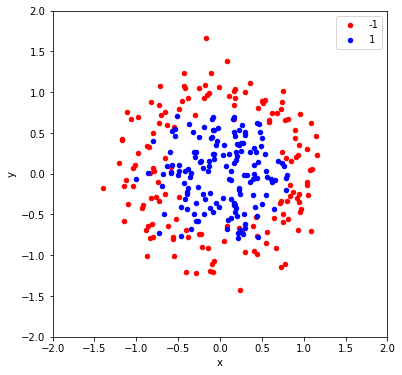

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax, n):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])

    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
    ax.axis('scaled')
    if n!=0:
      ax.set_title(f'weighted traning data, iteration {n}', fontsize=10)
    else:
      ax.set_title('testing data - final hypothesis', fontsize=15)
      



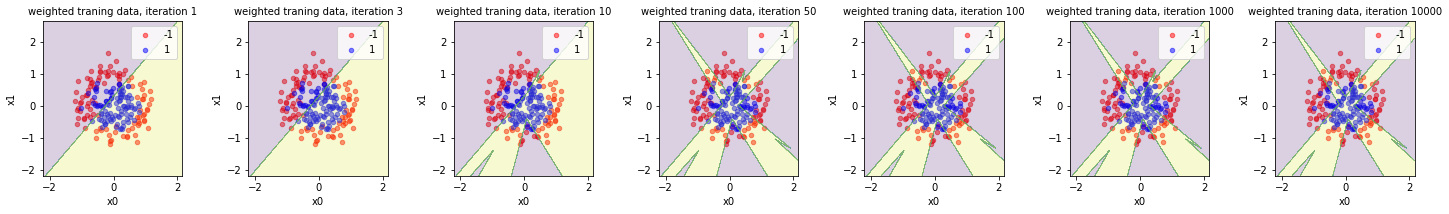

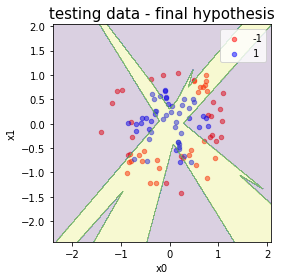

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3 , random_state=69)
svc=LinearSVC(tol=1e-10,loss='hinge',C=1000,max_iter=50000)
estimators = [1,3,10,50,100,1000,10000]
flg,(ax1,ax2,ax3,ax4,ax5,ax6,ax7)= plt.subplots(1,7,figsize=(20,20))
an_list=[ax1,ax2,ax3,ax4,ax5,ax6,ax7]
list_result_acc_train=[]
list_result_acc_test=[]
list_estimator_errors=[]
for n in range(len(estimators)):
# Create adaboost classifer object
  abc = AdaBoostClassifier(n_estimators=estimators[n], base_estimator=svc,algorithm='SAMME')
  # Train Adaboost Classifer
  abc.fit(X_train, y_train)
  # clculate estimator_errors
  if (estimators[n] == 10000):
    list_estimator_errors.append(abc.estimator_errors_)
  #Predict the response for test dataset
  y_pred_train = abc.predict(X_train)
  y_pred_test = abc.predict(X_test)
  # accuracy train
  list_result_acc_train.append(metrics.accuracy_score(y_train,y_pred_train))
  # accuracy test
  list_result_acc_test.append(metrics.accuracy_score(y_test,y_pred_test))
  flg.tight_layout()
  plot_data(X_train,y_train,abc.predict,an_list[n],estimators[n])

abc = AdaBoostClassifier(n_estimators=estimators[6], base_estimator=svc,algorithm='SAMME')
# Train Adaboost Classifer
abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = abc.predict(X_test)
result_acc = metrics.accuracy_score(y_test,y_pred)
fig, ax = plt.subplots()
plot_data(X_test,y_test,abc.predict,ax,0)



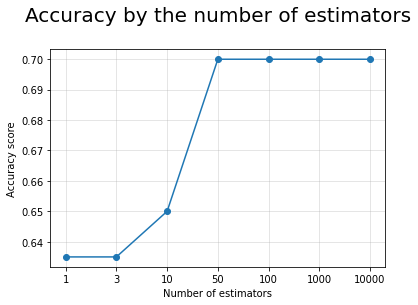

In [ ]:
values = range(len(estimators))
plt.plot(values,list_result_acc_train,marker="o")
plt.xticks(values,estimators)
plt.title("Accuracy by the number of estimators\n",fontsize = 20)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy score")
plt.grid(alpha=0.4)
plt.show()

We can see that as long as we increase the number of estimators the accuracy raise, until a critical point, where the accuracy remains stable even if we continue to increase the estimators.

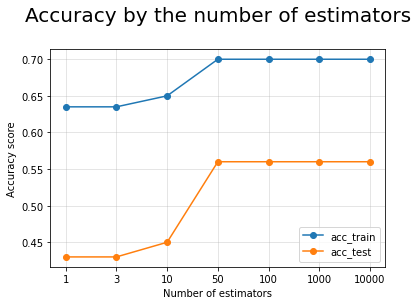

In [ ]:
list_acc=[list_result_acc_train,list_result_acc_test]
list_acc_str=["acc_train","acc_test"]
values = range(len(estimators))
for i in range(2):
  plt.plot(values,list_acc[i],marker="o")

plt.legend(list_acc_str,loc="lower right")
plt.xticks(values,estimators)
plt.title("Accuracy by the number of estimators\n",fontsize=20,)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy score")
plt.grid(alpha=0.4)
plt.show()

In order to check if our model overfit we plot our accuracy score of our train and test data sets.

As we can see from the graph, when the number of estimators reach **50** , the train and test result remains steady. 

We can infer that our model **doesn't overfit**. The train results and the test result don't change.

 **In case of overfiting** we would witness a large increase in our train accuracy (maybe until 100%), and a large decrease in our test accuracy, a phenomenon we don't see in our model.

 It is possible to find the **exact point of overfit** by plotting the accuracy by iterations and find such a critical point - when our test accuracy score begin to drop, and the train result raise.




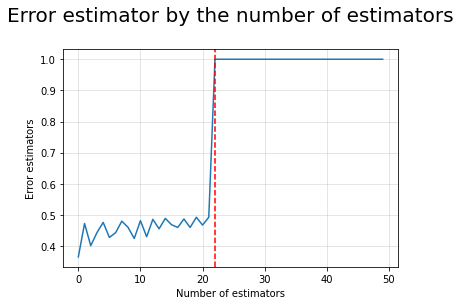

The optimal number of estimators is - 22 .


In [ ]:
x_lb=[i for i in range(list_estimator_errors[0].shape[0])]
plt.plot(x_lb[:50],list_estimator_errors[0][:50])
plt.title("Error estimator by the number of estimators\n",fontsize = 20)
plt.xlabel("Number of estimators")
plt.ylabel("Error estimators")
plt.grid(alpha=0.4)
plt.axvline(x=22, color = "red",linestyle='--')
plt.show()
print("The optimal number of estimators is -",np.nonzero(list_estimator_errors[0]==1)[0][0],'.')